---
---
#                              **PART-1**
---
---

# **Scikit-Learn Library**
---

### **Summary -**

It is a Python library that offers various features for data processing that can be used for classification, clustering, and model selection.

Model_selection is a method for setting a blueprint to analyze data and then using it to measure new data. Selecting a proper model allows you to generate accurate results when making a prediction.

Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

### **Parameters -**
0. ***arrayssequence of indexables with same length / shape[0]**
Allowed inputs are lists, numpy arrays, scipy-sparse
matrices or pandas dataframes.

1. **test_sizefloat or int, default=None**
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

2. **train_sizefloat or int, default=None**
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

3. **random_stateint, RandomState instance or None, default=None**
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary.

4. **shufflebool, default=True**
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

5. **stratifyarray-like, default=None**
If not None, data is split in a stratified fashion, using this as the class labels. 

# **1. sklearn.model_selection.train_test_split -**

### **Train-Test Split Evaluation**
The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The *first subset* is used to fit the model and is referred to as the training dataset. The *second subset* is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

**Train Dataset:** Used to fit the machine learning model.

**Test Dataset:** Used to evaluate the fit machine learning model.

### **Syntax -** 
sklearn.model_selection.train_test_split(
  *arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None) 

## **Train-Test Split Procedure in Scikit-Learn**
---

> ### **1.1 How to data is given as input for training and testing in SkLearn**

In [ ]:
#The function takes a loaded dataset as input and returns the dataset split into two subsets.
# split into train test sets
train, test = train_test_split(dataset, ...)

'''Ideally, you can split your original dataset into input (X) and output (y) columns, then call the function passing both arrays and have them split appropriately into train and test subsets.'''
# split into train test sets into 2 inputs
X_train, X_test, y_train, y_test = train_test_split(X, y, ...)

'''The size of the split can be specified via the “test_size” argument that takes a number of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.

The latter is the most common, with values used such as 0.33 where 33 percent of the dataset will be allocated to the test set and 67 percent will be allocated to the training set.'''
# split into train test sets with test percentage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

>> **1.1.1 Complete Example**

>> Inference - Here, 670 examples (67%) were allocated to the training set and 330 examples (33%) were allocated to the test set, as we specified.

In [ ]:
'''We can demonstrate this using a synthetic classification dataset with 1,000 examples.'''
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=1000)

'''Split into train test set  by specifying the “train_size” argument'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

'''Alternatively, the dataset can be split by specifying the “train_size” argument that can be either a number of rows (integer) or a percentage of the original dataset between 0 and 1, such as 0.67 for 67 percent.'''
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(670, 2) (330, 2) (670,) (330,)
(670, 2) (330, 2) (670,) (330,)


> ### **1.3 Repeatable Train-Test Splits**
> Another important consideration is that rows are assigned to the train and test sets randomly.

> This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset, which in turn, should be a representative sample of observations from the problem domain.

> This can be achieved by setting the **“random_state”** to an integer value. Any value will do; it is *not a tunable hyperparameter.*

In [ ]:
# split again with random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

>> **1.3.1 Example of splitting dataset with random state**

In [ ]:
# demonstrate that the train-test split procedure is repeatable
# create dataset
X, y = make_blobs(n_samples=100)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print('First 5 rows of data with Random State -->\n',X_train[:5, :])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print('\nFirst 5 rows of data without Random State -->\n',X_train[:5, :])

First 5 rows of data with Random State -->
 [[ -4.13233738  -8.38194674]
 [ -5.11588788  -5.99936385]
 [  2.16780402 -10.35992794]
 [  1.2979129   -6.13853463]
 [  0.39808619  -8.17024798]]

First 5 rows of data without Random State -->
 [[-5.93901335 -6.11105142]
 [ 2.01585295 -7.62172901]
 [ 2.13903729 -8.41124053]
 [ 2.32225611 -7.77710236]
 [ 1.28719029 -9.02181295]]


> ### **1.4 Stratified Train-Test Splits**
>* Some classification problems *do not have a **balanced** number of examples for each class label.* As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. This is called a **stratified train-test split.**

>* We can achieve this by setting the **“stratify” argument** to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [ ]:
# split into train test set with random state and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)

>* We can demonstrate this with an example of a classification dataset with 94 examples in one class and six examples in a second class.
>* First, we can split the dataset into train and test sets without the “stratify” argument. The complete example is listed below.

In [ ]:
# split imbalanced dataset into train and test sets without stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=100, weights=[0.94], flip_y=0, random_state=1)
print('<----------- Without Stratification ----------->\n',Counter(y))
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

<----------- Without Stratification ----------->
 Counter({0: 94, 1: 6})
Counter({0: 45, 1: 5})
Counter({0: 49, 1: 1})


> #### **Inference without Stratification of:** 
>* Running the example first reports the composition of the dataset by class label, showing the expected 94 percent vs. 6 percent.
>* Then the dataset is split and the composition of the train and test sets is reported. We can see that the train set has **45/5** examples in the test set has **49/1** examples. The composition of the train and test sets differ, and this is not desirable.

> ### **Stratify the samples**
>* Next, we can stratify the train-test split and compare the results.

In [ ]:
# split imbalanced dataset into train and test sets with stratification
print('<----------- With Stratification ----------->\n',Counter(y))
# split into train test sets with random state and stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

<----------- With Stratification ----------->
 Counter({0: 94, 1: 6})
Counter({0: 47, 1: 3})
Counter({0: 47, 1: 3})


> #### **Inference with Stratification of Samples :** 
>* Running the example, we can see that in this case, the stratified version of the train-test split has created both the train and test datasets with **47/3** examples in the train/test sets as we expected.

# **2. sklearn.datasets.make_classification**
---
### **Syntax :**
**sklearn.datasets.make_classification**(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

### **Discover Parameters of make_classfication --->**

In [ ]:
help('sklearn.datasets.make_classification')

Help on function make_classification in sklearn.datasets:

sklearn.datasets.make_classification = make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    d

> # **2.1 *sklearn.datasets.make_classification* on *load_iris* Dataset** 
---
>>## **2.1.1 Example - Classifier comparison**
>>* A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries
of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.
* Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.
* The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

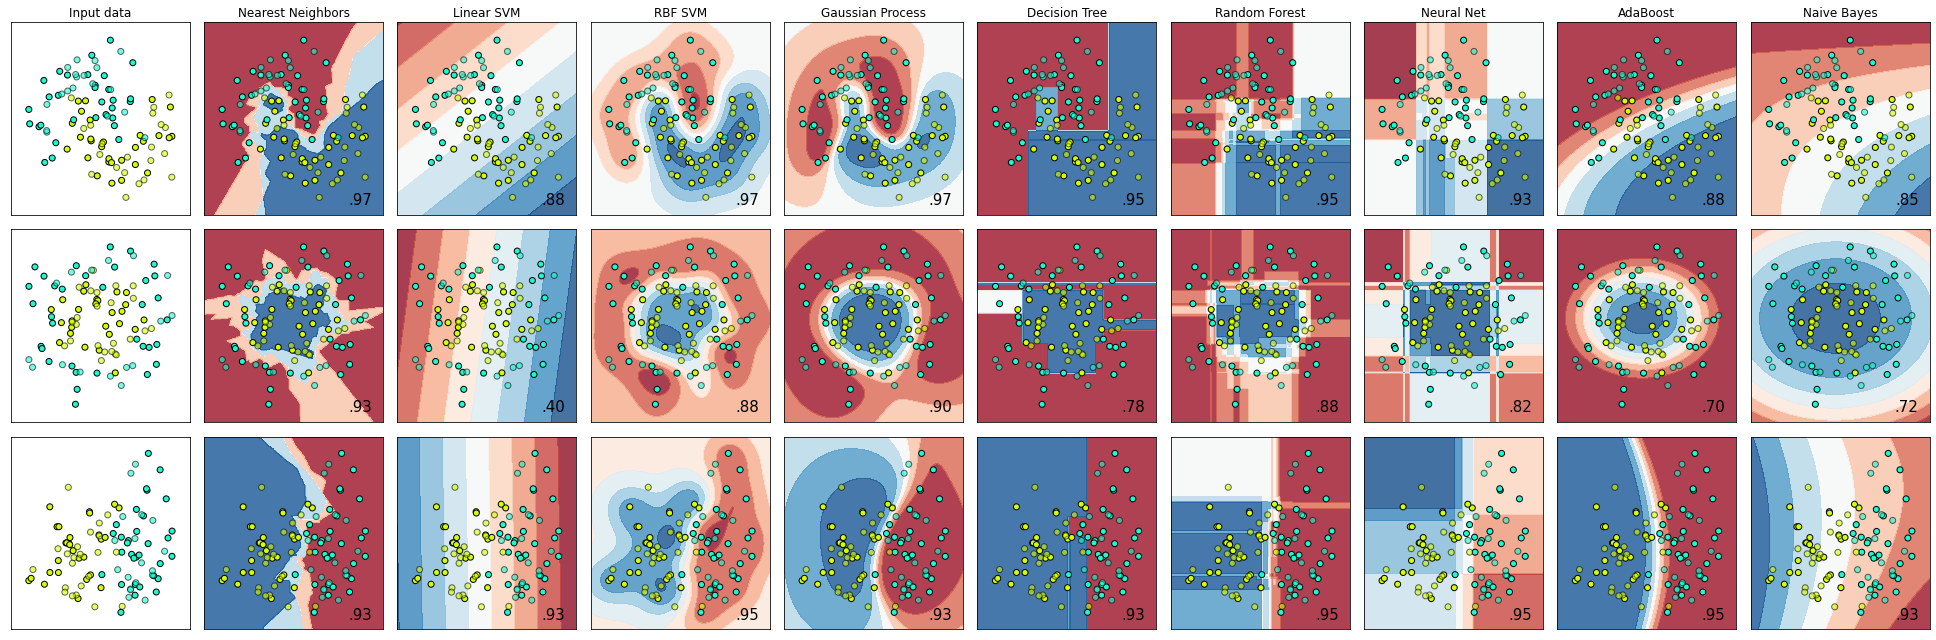

In [ ]:
h = 0.02  # step size in the mesh
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3), # Number of neighbors to use by default for kneighbors queries.
    SVC(kernel="linear", C=0.025), #kerenel, regularization parameter
    SVC(gamma=2, C=1), # Kernel coefficient for 'rbf', 'poly' and 'sigmoid', regularization parameter
    # The kernel specifying the covariance function of the GP. If None is passed, the kernel "1.0 * RBF(1.0)" is used as default. 
    # Note - that the kernel's hyperparameters are optimized during fitting.
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5), #The maximum depth of the tree.
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),#Max depth of tree, The no. of trees in the forest, no. of features to consider when looking for the best split
    AdaBoostClassifier(), # Boosts the performance of any machine learning algorithm.
    GaussianNB(), # used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.
    # A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
    # The model fits a Gaussian density to each class.
    QuadraticDiscriminantAnalysis(),
]

'''Generate a random n-class classification problem.
This initially creates clusters of points normally distributed (std=1)
Params- n_features=2 --------------> No. of features,
      - n_redundant=0 -------------> Random linear combinations of the informative features,
      - n_informative=2 -----------> No. of informative features. Each class is composed of a no. of gaussian clusters.
      - random_state=1 ------------> Determines random number generation for dataset creation
      - n_clusters_per_class=1 ----> No. of clusters per class
'''
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2) #Random seed used to initialize the pseudo-random number generator 
X += 2 * rng.uniform(size=X.shape) #Draw samples from a uniform distribution.
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0), #Make two interleaving half circles - Standard deviation of Gaussian noise added to the data., no random state
    #Make a large circle containing a smaller circle in 2d - add noise to data, Scale factor between inner and outer circle in the range (0, 1), no random state=0'''
    make_circles(noise=0.2, factor=0.5, random_state=1), 
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))   # Plot figure of the given figsize
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets): # enumerate fetched keys/index and its corresponding values from variable passed as arg
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X) #returns a transformed version of X.
    # train and test dataset with random values with Train-Test split of 60%-40%
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    '''np.meshgrid() - Return coordinate matrices from coordinate vectors. Make N-D coordinate arrays for vectorized evaluations 
    of N-D scalar/vector fields over N-D grids'''
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#18fbd2", "#d4ff00"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max()) #Set the x-axis view limits.
        ax.set_ylim(yy.min(), yy.max()) #Set the y-axis view limits.
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.
plt.show() #Display all figures.

# **3. sklearn.datasets.make_regression**
---
Generate a random regression problem.

The input set can either be well conditioned (by default) or have a low rank-fat tail singular profile.

The output is generated by applying a (potentially biased) random linear regression model with n_informative nonzero regressors to the previously generated input and some gaussian centered noise with some adjustable scale.\

## **Syntax :**
**sklearn.datasets.make_regression**(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)

### **Discover Parameters of make_regression --->**


In [1]:
help('sklearn.datasets.make_regression')

Help on function make_regression in sklearn.datasets:

sklearn.datasets.make_regression = make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
    Generate a random regression problem.
    
    The input set can either be well conditioned (by default) or have a low
    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
    more details.
    
    The output is generated by applying a (potentially biased) random linear
    regression model with `n_informative` nonzero regressors to the previously
    generated input and some gaussian centered noise with some adjustable
    scale.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, default=100
        The number of samples.
    
    n_features : int, default=100
        The number of features.
    
    n_informative : int

> # **3.1 *sklearn.datasets.make_regression* on *load_iris* Dataset** 
---
>>## **3.1.1 Example - HuberRegressor vs Ridge on dataset with strong outliers**
>>* Fit Ridge and HuberRegressor on a dataset with outliers.

>>* The example shows that the predictions in ridge are strongly influenced by the outliers present in the dataset. The Huber regressor is less influenced by the outliers since the model uses the linear loss for these. As the parameter epsilon is increased for the Huber regressor, the decision function approaches that of the ridge.

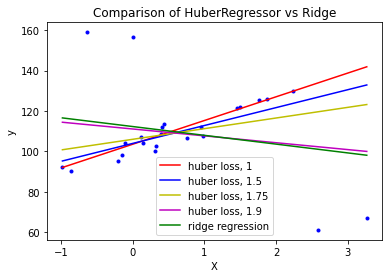

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(
    n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0
)

# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, "b.")

# Fit the huber regressor over a series of epsilon values.
colors = ["r-", "b-", "y-", "m-"]

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=0.0, random_state=0)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()

# **4. sklearn.datasets.load_boston**
---
The Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.

The scikit-learn maintainers therefore strongly discourage the use of this dataset unless the purpose of the code is to study and educate about ethical issues in data science and machine learning.

## **Syntax :**
**sklearn.datasets.load_boston**(*, return_X_y=False)

### **Discover Parameters of sklearn.datasets.load_boston --->**


In [26]:
help('sklearn.datasets.load_boston')

Help on function load_boston in sklearn.datasets:

sklearn.datasets.load_boston = load_boston(*, return_X_y=False)
    DEPRECATED: `load_boston` is deprecated in 1.0 and will be removed in 1.2.
    
    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.
    
    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.
    
    In this special case, you can fetch the dataset from the original
    source::
    
        import pandas as pd
        import numpy as np
    
    
        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]
    
    Alternative datasets include 

### **4.1 Example -**

In [27]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
     # You should probably not use this dataset.
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


# **4. sklearn.dummy.DummyRegressor**
---
Regressor that makes predictions using simple rules.

This regressor is useful as a simple baseline to compare with other (real) regressors. Do not use it for real problems.

## **Syntax :**
**class sklearn.dummy.DummyRegressor**(*, strategy='mean', constant=None, quantile=None)

### **Discover Parameters of sklearn.dummy.DummyRegressor --->**


In [3]:
help('sklearn.dummy.DummyRegressor')

Help on class DummyRegressor in sklearn.dummy:

sklearn.dummy.DummyRegressor = class DummyRegressor(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
 |  sklearn.dummy.DummyRegressor(*, strategy='mean', constant=None, quantile=None)
 |  
 |  Regressor that makes predictions using simple rules.
 |  
 |  This regressor is useful as a simple baseline to compare with other
 |  (real) regressors. Do not use it for real problems.
 |  
 |  Read more in the :ref:`User Guide <dummy_estimators>`.
 |  
 |  .. versionadded:: 0.13
 |  
 |  Parameters
 |  ----------
 |  strategy : {"mean", "median", "quantile", "constant"}, default="mean"
 |      Strategy to use to generate predictions.
 |  
 |      * "mean": always predicts the mean of the training set
 |      * "median": always predicts the median of the training set
 |      * "quantile": always predicts a specified quantile of the training set,
 |        provided with the quantile parameter.
 |      * "consta

> ### **4.1 Example :**

In [9]:
import numpy as np
from sklearn.dummy import DummyRegressor
X = np.array([1.0, 2.0, 3.0, 4.0])
y = np.array([2.0, 3.0, 5.0, 10.0])
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
DummyRegressor()
print(dummy_regr.predict(X))
print(dummy_regr.score(X, y))

[5. 5. 5. 5.]
0.0


# **5. sklearn.dummy.DummyClassifier**
---
DummyClassifier makes predictions that ignore the input features.

This classifier serves as a simple baseline to compare against other more complex classifiers.

The specific behavior of the baseline is selected with the strategy parameter.

All strategies make predictions that ignore the input feature values passed as the X argument to fit and predict. The predictions, however, typically depend on values observed in the y parameter passed to fit.

Note that the “stratified” and “uniform” strategies lead to non-deterministic predictions that can be rendered deterministic by setting the random_state parameter if needed. The other strategies are naturally deterministic and, once fit, always return a the same constant prediction for any value of X.

## **Syntax :**
**class sklearn.dummy.DummyClassifier**(*, strategy='prior', random_state=None, constant=None)

### **Discover Parameters of sklearn.dummy.DummyClassifier --->**


In [10]:
import numpy as np
from sklearn.dummy import DummyClassifier
X = np.array([-1, 1, 1, 1])
y = np.array([0, 1, 1, 1])
dummy_clf = DummyClassifier(strategy="most_frequent")
print(dummy_clf.fit(X, y))
DummyClassifier(strategy='most_frequent')
print(dummy_clf.predict(X))
print(dummy_clf.score(X, y))

DummyClassifier(strategy='most_frequent')
[1 1 1 1]
0.75


# **6. sklearn.metrics.accuracy_score**
---
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must exactly match the
corresponding set of labels in y_true.

## **Syntax :**
**sklearn.metrics.accuracy_score**(y_true, y_pred, *, normalize=True, sample_weight=None)

**See also**

**balanced_accuracy_score**
* Compute the balanced accuracy to deal with imbalanced datasets.

**jaccard_score**
* Compute the Jaccard similarity coefficient score.

**hamming_loss**
* Compute the average Hamming loss or Hamming distance between two sets of samples.

**zero_one_loss**
* Compute the Zero-one classification loss. By default, the function will return the percentage of imperfectly predicted subsets.

### **Discover Parameters of sklearn.metrics.accuracy_score --->**


In [11]:
help('sklearn.metrics.accuracy_score')

Help on function accuracy_score in sklearn.metrics:

sklearn.metrics.accuracy_score = accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
  

> # **6.1 sklearn.metrics.accuracy_score** 
---
>>## **6.1.1 Example - Multi-class AdaBoosted Decision Trees**

>>*  The classification dataset is constructed by taking a ten-dimensional standard normal distribution and defining three classes separated by nested concentric ten-dimensional spheres such that roughly equal numbers of samples are in each class (quantiles of the χ2 distribution).

>>* The performance of the SAMME and SAMME.R 1 algorithms are compared. SAMME.R uses the probability estimates to update the additive model, while SAMME uses the classifications only. As the example illustrates, the SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. The error of each algorithm on the test set after each boosting iteration is shown on the left, the classification error on the test set of each tree is shown in the middle, and the boost weight of each tree is shown on the right. All trees have a weight of one in the SAMME.R algorithm and therefore are not shown.

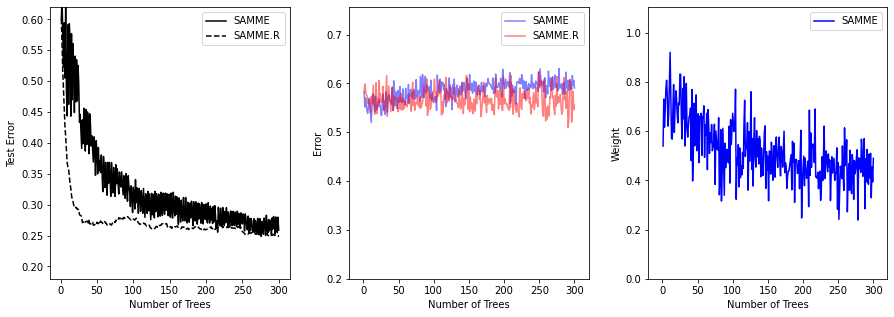

In [12]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=1
)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")
plt.plot(
    range(1, n_trees_real + 1),
    real_test_errors,
    c="black",
    linestyle="dashed",
    label="SAMME.R",
)
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)
plt.plot(
    range(1, n_trees_real + 1), real_estimator_errors, "r", label="SAMME.R", alpha=0.5
)
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim((0.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

# **7. sklearn.metrics.classification_report**
---
Build a text report showing the main classification metrics

## **Syntax :**
**sklearn.metrics.classification_report**(y_true, y_pred, labels=None, target_names=None, sample_weight=None)

### **Discover Parameters of sklearn.metrics.classification_report --->**


In [13]:
help('sklearn.metrics.classification_report')

Help on function classification_report in sklearn.metrics:

sklearn.metrics.classification_report = classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
    Build a text report showing the main classification metrics.
    
    Read more in the :ref:`User Guide <classification_report>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_labels,), default=None
        Optional list of label indices to include in the report.
    
    target_names : list of str of shape (n_labels,), default=None
        Optional display names matching the labels (same order).
    
    sample_weight : array-like of shape (n_samples,), default=None
      

> ### **7.1 Example -** 

In [23]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



# **8. sklearn.metrics.confusion_matrix**
---
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix C is such that Ci,j is equal to the number of observations known to be in group i and predicted to be in group j.

Thus in binary classification, the count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1.

## **Syntax :**
**sklearn.metrics.confusion_matrix**(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

### **Discover Parameters of sklearn.metrics.classification_report --->**


In [25]:
help('sklearn.metrics.confusion_matrix')

Help on function confusion_matrix in sklearn.metrics:

sklearn.metrics.confusion_matrix = confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classe

> # **8.1 sklearn.metrics.confusion_matrix** 
---
>>## **8.1.1 Example - Label Propagation digits active learning**

>>* Demonstrates an active learning technique to learn handwritten digits using label propagation.

>>* We start by training a label propagation model with only 10 labeled points, then we select the top five most uncertain points to label. Next, we train with 15 labeled points (original 10 + 5 new ones). We repeat this process four times to have a model trained with 30 labeled examples. Note you can increase this to label more than 30 by changing max_iterations. Labeling more than 30 can be useful to get a sense for the speed of convergence of this active learning technique.

>>* A plot will appear showing the top 5 most uncertain digits for each iteration of training. These may or may not contain mistakes, but we will train the next model with their true labels.

Iteration 0 ______________________________________________________________________
Label Spreading model: 40 labeled & 290 unlabeled (330 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.78      0.69      0.73        26
           2       0.93      0.93      0.93        29
           3       1.00      0.89      0.94        27
           4       0.92      0.96      0.94        23
           5       0.96      0.70      0.81        33
           6       0.97      0.97      0.97        35
           7       0.94      0.91      0.92        33
           8       0.62      0.89      0.74        28
           9       0.73      0.79      0.76        34

    accuracy                           0.87       290
   macro avg       0.89      0.87      0.87       290
weighted avg       0.88      0.87      0.87       290

Confusion matrix
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 18  2  0  0  0  1  0  5  0]
 [ 0  0 27  0

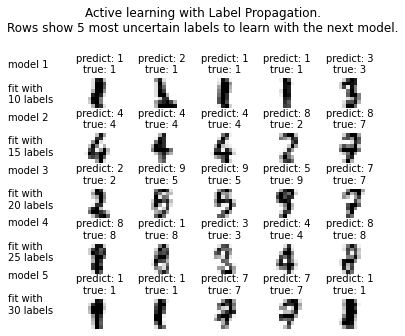

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, confusion_matrix

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 40
max_iterations = 5

unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
f = plt.figure()

for i in range(max_iterations):
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    y_train[unlabeled_indices] = -1

    lp_model = LabelSpreading(gamma=0.25, max_iter=20)
    lp_model.fit(X, y_train)

    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]

    cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

    print("Iteration %i %s" % (i, 70 * "_"))
    print(
        "Label Spreading model: %d labeled & %d unlabeled (%d total)"
        % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
    )

    print(classification_report(true_labels, predicted_labels))

    print("Confusion matrix")
    print(cm)

    # compute the entropies of transduced label distributions
    pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

    # select up to 5 digit examples that the classifier is most uncertain about
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.in1d(uncertainty_index, unlabeled_indices)
    ][:5]

    # keep track of indices that we get labels for
    delete_indices = np.array([], dtype=int)

    # for more than 5 iterations, visualize the gain only on the first 5
    if i < 5:
        f.text(
            0.05,
            (1 - (i + 1) * 0.183),
            "model %d\n\nfit with\n%d labels" % ((i + 1), i * 5 + 10),
            size=10,
        )
    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]

        # for more than 5 iterations, visualize the gain only on the first 5
        if i < 5:
            sub = f.add_subplot(5, 5, index + 1 + (5 * i))
            sub.imshow(image, cmap=plt.cm.gray_r, interpolation="none")
            sub.set_title(
                "predict: %i\ntrue: %i"
                % (lp_model.transduction_[image_index], y[image_index]),
                size=10,
            )
            sub.axis("off")

        # labeling 5 points, remote from labeled set
        (delete_index,) = np.where(unlabeled_indices == image_index)
        delete_indices = np.concatenate((delete_indices, delete_index))

    unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
    n_labeled_points += len(uncertainty_index)

f.suptitle(
    "Active learning with Label Propagation.\nRows show 5 most "
    "uncertain labels to learn with the next model.",
    y=1.15,
)
plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2, hspace=0.85)
plt.show()

---
---
# **PART-2**
---
---

### **Q1 - What are the different parameters of the above functions/methods that are part of the above SKLearn modules?**

Ans - 
1. **sklearn.model_selection.train_test_split**( *arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
2. **sklearn.datasets.make_classification**(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
3. **sklearn.datasets.load_iris**(*, return_X_y=False, as_frame=False)
4. **sklearn.datasets.make_regression**(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
5. **sklearn.datasets.load_boston**(*, return_X_y=False)
6. **class sklearn.dummy.DummyRegressor**(*, strategy='mean', constant=None, quantile=None)
7. **class sklearn.dummy.DummyClassifier**(*, strategy='prior', random_state=None, constant=None)
8. **sklearn.metrics.accuracy_score**(y_true, y_pred, *, normalize=True, sample_weight=None)
9. **sklearn.metrics.classification_report**(y_true, y_pred, labels=None, target_names=None, sample_weight=None)
10. **sklearn.metrics.confusion_matrix**(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)